In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [5]:
ds=pd.read_csv('skyserver.csv')
ds

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [6]:
df=pd.DataFrame(data=ds)
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [7]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

observation:
    objid = Object Identifier
     ra = J2000 Right Ascension (r-band)
    dec = J2000 Declination (r-band)
    u = better of DeV/Exp magnitude fit
    g = better of DeV/Exp magnitude fit
    r = better of DeV/Exp magnitude fit
    i = better of DeV/Exp magnitude fit
    z = better of DeV/Exp magnitude fit
    run = Run Number
    rereun = Rerun Number
    camcol = Camera column
    field = Field number
    specobjid = Object Identifierredshift = Final Redshift
    class = object class (galaxy, star or quasar object)
    plate = plate number
    mjd = MJD of observation
    fiberid = fiber ID
    
    

In [8]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.3+ MB


In [10]:
#checking for any missing value present in or dataset
df.isnull()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

obsevation: no null or nan values present in data

# Summary Statistics

In [12]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


observation:
    huge difference in values max values and Q3 value in plate,redshift,specobjid and field, hence outliers are present.
    std deviation is high in dec and plate

To Check the Corelation

In [13]:
df_corr=df.corr()
df_corr

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


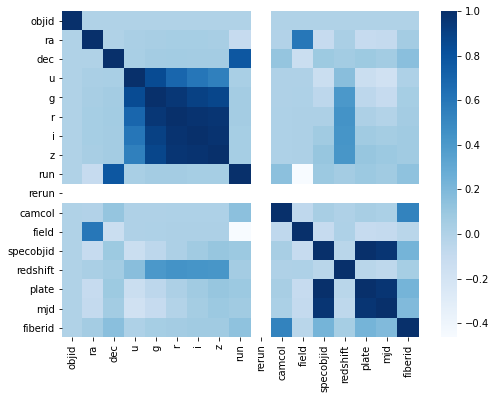

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df_corr,fmt='.0%',cmap='Blues')
plt.show()

observation:
    r,i,z are highly corelated to each other
    plate,mjd are positively corelated to specobjid
    objid is negatively corelated
    

# Data Visualisation

univariate Analysis

Text(0.5, 1.0, 'class of object')

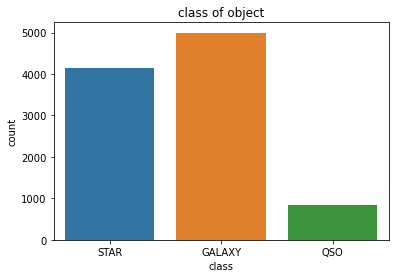

In [15]:
#checking the class 
plt.subplots(figsize=(6,4))
sns.countplot(x='class',data=df)
plt.title('class of object')


In [90]:
#checking skewness
df.skew()

objid        1.000150
ra          -3.366183
dec          0.298224
u           -1.350023
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    0.689338
class        0.381391
redshift     0.576520
plate        0.863260
mjd          1.018098
fiberid      0.308053
dtype: float64

In [24]:
#changing target variable into numeric type
df['class']=df['class'].map({'STAR':0,'GALAXY':1,'QSO':2})
df['class'].dtypes

dtype('int64')

In [25]:
df['class'].unique()

array([0, 1, 2], dtype=int64)

In [93]:
df['redshift'].fillna(0,inplace=True)
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,1.784528,0.299488,1.390826,17.04240,15.94699,15.50342,15.22531,752,301,4,267,4.623899,0,0.000000,7.582732,15.308639,491
1,1.237650e+18,1.784600,0.367811,1.384266,17.21449,16.67637,16.48922,16.39150,752,301,4,267,4.496411,0,0.000000,4.239363,15.072802,541
2,1.237650e+18,1.784689,0.355225,1.390102,18.19169,17.47428,17.08732,16.80125,752,301,4,268,4.489837,1,0.592345,4.115954,15.102500,513
3,1.237650e+18,1.784894,0.223407,1.376707,16.60272,16.16116,15.98233,15.90438,752,301,4,269,4.623899,0,0.000000,7.582732,15.308639,510
4,1.237650e+18,1.784908,0.320245,1.374845,16.26342,16.43869,16.55492,16.61326,752,301,4,269,4.623899,0,0.155876,7.582732,15.308639,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,1.719368,7.179105,1.385539,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,4.514424,1,0.407531,4.598084,15.091893,246
9996,1.237650e+18,1.719353,7.188278,1.381020,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,4.514424,1,0.585815,4.598084,15.091893,228
9997,1.237650e+18,1.719711,7.187975,1.385051,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,4.666552,0,0.000000,9.244328,15.452312,622
9998,1.237650e+18,1.719601,7.193961,1.386071,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,4.514424,1,0.344095,4.598084,15.091893,229


In [28]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,5.682901,0.299488,2.690412,17.04240,15.94699,15.50342,15.22531,752,301,4,267,21.380445,0,0.000000,57.497826,234.354432,491
1,1.237650e+18,5.683593,0.367811,2.652522,17.21449,16.67637,16.48922,16.39150,752,301,4,267,20.217710,0,0.000000,17.972201,227.189348,541
2,1.237650e+18,5.684437,0.355225,2.686211,18.19169,17.47428,17.08732,16.80125,752,301,4,268,20.158638,1,0.350872,16.941074,228.085510,513
3,1.237650e+18,5.686400,0.223407,2.609304,16.60272,16.16116,15.98233,15.90438,752,301,4,269,21.380446,0,0.000000,57.497826,234.354432,510
4,1.237650e+18,5.686531,0.320245,2.598730,16.26342,16.43869,16.55492,16.61326,752,301,4,269,21.380446,0,0.024297,57.497826,234.354432,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,5.082839,7.179105,2.659843,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,20.380026,1,0.166081,21.142375,227.765230,246
9996,1.237650e+18,5.082706,7.188278,2.633903,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,20.380021,1,0.343180,21.142375,227.765230,228
9997,1.237650e+18,5.085884,7.187975,2.657033,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,21.776710,0,0.000000,85.457592,238.773952,622
9998,1.237650e+18,5.084912,7.193961,2.662907,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,20.380021,1,0.118402,21.142375,227.765230,229


In [55]:
df.isnull()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [91]:
df.isnull().sum()

objid           0
ra              0
dec          3774
u               0
g               0
r               0
i               0
z               0
run             0
rerun           0
camcol          0
field           0
specobjid       0
class           0
redshift        0
plate           0
mjd             0
fiberid         0
dtype: int64

In [94]:
df['dec'].fillna(0,inplace=True)
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,1.784528,0.299488,1.390826,17.04240,15.94699,15.50342,15.22531,752,301,4,267,4.623899,0,0.000000,7.582732,15.308639,491
1,1.237650e+18,1.784600,0.367811,1.384266,17.21449,16.67637,16.48922,16.39150,752,301,4,267,4.496411,0,0.000000,4.239363,15.072802,541
2,1.237650e+18,1.784689,0.355225,1.390102,18.19169,17.47428,17.08732,16.80125,752,301,4,268,4.489837,1,0.592345,4.115954,15.102500,513
3,1.237650e+18,1.784894,0.223407,1.376707,16.60272,16.16116,15.98233,15.90438,752,301,4,269,4.623899,0,0.000000,7.582732,15.308639,510
4,1.237650e+18,1.784908,0.320245,1.374845,16.26342,16.43869,16.55492,16.61326,752,301,4,269,4.623899,0,0.155876,7.582732,15.308639,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,1.719368,7.179105,1.385539,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,4.514424,1,0.407531,4.598084,15.091893,246
9996,1.237650e+18,1.719353,7.188278,1.381020,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,4.514424,1,0.585815,4.598084,15.091893,228
9997,1.237650e+18,1.719711,7.187975,1.385051,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,4.666552,0,0.000000,9.244328,15.452312,622
9998,1.237650e+18,1.719601,7.193961,1.386071,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,4.514424,1,0.344095,4.598084,15.091893,229


In [95]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [96]:
y=df[['class']]
y

,class
0,0
1,0
2,1
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [97]:
x=df.drop(columns=['class','objid','rerun'])
x

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,1.784528,0.299488,1.390826,17.04240,15.94699,15.50342,15.22531,752,4,267,4.623899,0.000000,7.582732,15.308639,491
1,1.784600,0.367811,1.384266,17.21449,16.67637,16.48922,16.39150,752,4,267,4.496411,0.000000,4.239363,15.072802,541
2,1.784689,0.355225,1.390102,18.19169,17.47428,17.08732,16.80125,752,4,268,4.489837,0.592345,4.115954,15.102500,513
3,1.784894,0.223407,1.376707,16.60272,16.16116,15.98233,15.90438,752,4,269,4.623899,0.000000,7.582732,15.308639,510
4,1.784908,0.320245,1.374845,16.26342,16.43869,16.55492,16.61326,752,4,269,4.623899,0.155876,7.582732,15.308639,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.719368,7.179105,1.385539,17.47053,16.91508,16.68305,16.50570,1345,3,161,4.514424,0.407531,4.598084,15.091893,246
9996,1.719353,7.188278,1.381020,17.43849,17.07692,16.71661,16.69897,1345,3,162,4.514424,0.585815,4.598084,15.091893,228
9997,1.719711,7.187975,1.385051,17.77784,17.51872,17.43302,17.42048,1345,3,162,4.666552,0.000000,9.244328,15.452312,622
9998,1.719601,7.193961,1.386071,17.91068,17.53152,17.36284,17.13988,1345,3,163,4.514424,0.344095,4.598084,15.091893,229


In [98]:
y

,class
0,0
1,0
2,1
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [99]:
#scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.23974423, -0.63380655,  1.00414582, ...,  1.30419536,
         1.31584329,  0.66863177],
       [ 0.24055645, -0.61214665,  0.07098081, ..., -0.75472654,
        -0.88647407,  0.91101156],
       [ 0.24154752, -0.61613659,  0.90112024, ..., -0.83072496,
        -0.60914088,  0.77527888],
       ...,
       [-0.48719728,  1.54998955,  0.18254295, ...,  2.32744329,
         2.65750259,  1.3036668 ],
       [-0.48842606,  1.55188704,  0.32762981, ..., -0.53381835,
        -0.70819462, -0.60143828],
       [-0.48536616,  1.55303779,  0.77939883, ..., -0.53381835,
        -0.70819462, -0.5820479 ]])

In [100]:
x.shape

(10000, 15)

In [101]:
y.shape

(10000, 1)

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=42)

In [104]:
train_x.shape

(7800, 15)

In [105]:
test_x.shape

(2200, 15)

In [106]:
train_y.shape

(7800, 1)

In [107]:
test_y.shape

(2200, 1)

In [108]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report




In [109]:
# All alogorithm by using for loop
model=[GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),
      BaggingClassifier(),ExtraTreesClassifier()]

In [111]:
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    pred_m=m.predict(test_x)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(test_y,pred_m))
    print(confusion_matrix(test_y,pred_m))
    print(classification_report(test_y,pred_m))
    print('***************************************************************************************************')
    print('\n')

Accuracy score of GaussianNB() is:
0.975
[[ 900    1    0]
 [  25 1042   18]
 [   0   11  203]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       901
           1       0.99      0.96      0.97      1085
           2       0.92      0.95      0.93       214

    accuracy                           0.97      2200
   macro avg       0.96      0.97      0.96      2200
weighted avg       0.98      0.97      0.98      2200

***************************************************************************************************


Accuracy score of SVC() is:
0.9890909090909091
[[ 900    1    0]
 [  11 1070    4]
 [   0    8  206]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       901
           1       0.99      0.99      0.99      1085
           2       0.98      0.96      0.97       214

    accuracy                           0.99      2200
   macro avg       0.99      0.98      0.98    

In [115]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [116]:
#Cross Validate the models:
models=[GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),
       BaggingClassifier(),ExtraTreesClassifier()]

In [117]:
for m in models:
    score=cross_val_score(m,x,y,cv=15,scoring='accuracy')
    print("Model:",m)
    print("Score:",score)
    print("MeanScore:",score.mean())
    print("standard deviation:",score.std())
    print('***************************************************************************')
    print('\n')

Model: GaussianNB()
Score: [0.97601199 0.97901049 0.97001499 0.982009   0.9850075  0.98050975
 0.96401799 0.97901049 0.97301349 0.96101949 0.95345345 0.95645646
 0.97897898 0.96846847 0.97747748]
MeanScore: 0.9722973348160757
standard deviation: 0.00938389756671726
***************************************************************************


Model: SVC()
Score: [0.99250375 0.98650675 0.9850075  0.988006   0.99550225 0.98950525
 0.988006   0.9910045  0.98650675 0.9850075  0.98348348 0.98348348
 0.99099099 0.98498498 0.98798799]
MeanScore: 0.9878991435213326
standard deviation: 0.0033557100761350696
***************************************************************************


Model: DecisionTreeClassifier()
Score: [0.98350825 0.988006   0.98050975 0.988006   0.95352324 0.98050975
 0.982009   0.9910045  0.98050975 0.97301349 0.98048048 0.98048048
 0.98798799 0.96696697 0.98198198]
MeanScore: 0.9798998398698548
standard deviation: 0.009143857312826277
**************************************

In [ ]:
from the above we find that Random Forest, Bagging Classifier and ExtraTrees is performing better